<a href="https://colab.research.google.com/github/GreatLearningAIML1/bangalore-aug19-batch-kartik1975/blob/master/Neural_Networks__Deep_Learning_SVHN_CNN__Sol_KK_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project #  Objective

The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows:

1.  Understand the basic Image Classification pipeline and the data-driven approach
(train/predict stages)
2.  Data fetching and understand the train/test splits. (5 points)
3.  Implement and apply a deep neural network classifier including (15 points)
4.  Implement batch normalization for training the neural network (5 points)
5.  Print the classification accuracy metrics (10 points)

***The Real Problem***

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern-day map making. A classic example of a corpus of such street level photographs are Google’s Street View imagery comprised of hundreds of millions of geo-located 360-degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the
location of the building it represents. More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles, orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and
occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.

In this project, we will use the dataset with images centered around a single digit (many of the images do contain some distractors at the sides. Although we are taking a sample of the data which is simpler, it is more complex than MNIST because of the distractors.

The goal of this project is to build a python code for image classification from scratch to understand the nitty gritties of building and training a model and further to understand the advantages of neural networks. First we will implement a simple KNN classifier and later implement a Neural Network to classify the images in the SVHN dataset. We will compare the computational efficiency and accuracy between the traditional methods and neural networks.

The Street View House Numbers (SVHN) Dataset SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with the minimal requirement on data formatting but comes from a
significantly harder, unsolved, real-world problem (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google Street View images.

Link to the dataset:
https://drive.google.com/file/d/1L2-WXzguhUsCArrFUc8EEkXcj33pahoS/view?usp=sharing

Acknowledgment for the datasets.
Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng Reading Digits in Natural Images with Unsupervised Feature Learning NIPS Workshop on Deep Learning and Unsupervised Feature Learning 2011. PDF
http://ufldl.stanford.edu/housenumbers as the URL for this site when necessary.


# Importing libraries


In [0]:
#Importing important libraries
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
#To enable plotting graphs in Jupyter notebook
%matplotlib inline
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import imutils
import cv2
import sklearn

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the Dataset

Reshape 

* Understandd the train, validation and test shapes mentioned in the H5 file

* then find the small rectangular bounding box boundaries by visualizing the shapes which are cropped version of the original images to remove redundant information, hence reduction of the size of images. 

* After cropping, images are re-sized 32X32 for computational convenience

Normalization 

Second, unlike the MNIST dataset, the SVHN dataset comes from the real world image, which has 3 color channels. Our goal is to recognize the digits, so the color doesn't matter. so i converted the images to greyscale, then subtract the mean of each image and divide by its standard deviation. The image information is stored into numpy ndarray.</h3>

In [15]:
import h5py
import numpy as np
h5f= h5py.File('/content/drive/My Drive/Colab Notebooks/SVHN_single_grey1.h5','r')
list(h5f.keys())



['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [16]:
X_test = h5f['X_test'][:]
X_train = h5f['X_train'][:]
X_val = h5f['X_val'][:]
y_test = h5f['y_test'][:]
y_train = h5f['y_train'][:]
y_val = h5f['y_val'][:]

# Close this file
h5f.close()

print('Train set', X_train.shape, y_train.shape)
print('Validation set', X_val.shape, y_val.shape)
print('Test set', X_test.shape, y_test.shape)

Train set (42000, 32, 32) (42000,)
Validation set (60000, 32, 32) (60000,)
Test set (18000, 32, 32) (18000,)


In [17]:
print("train data points: {}".format(len(y_train)))
print("validation data points: {}".format(len(y_val)))
print("test data points: {}".format(len(y_test)))

train data points: 42000
validation data points: 60000
test data points: 18000


<h4>Dataset Visualization </h4>

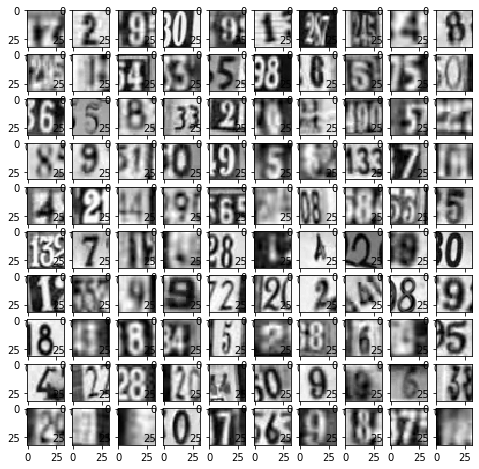

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
w=10
h=10
fig=plt.figure(figsize=(8, 8))
columns = 10
rows = 10
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
plt.show()

In [20]:
print(X_train.shape)


(42000, 32, 32)


In [21]:
print(y_train.shape)

(42000,)


In [0]:
#Represent Training & Testing samples suitable for #tensorflow backend
x_train=X_train.reshape(X_train.shape[0],1024).astype('float32')
x_test=X_test.reshape(X_test.shape[0],1024).astype('float32')
x_val=X_val.reshape(X_val.shape[0],1024).astype('float32')

x_train /= 255
x_test /= 255
x_val /= 255

In [23]:
x_train.shape

(42000, 1024)

In [26]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(42000, 1024)
(42000,)
(18000, 1024)
(18000,)


In [27]:
print(x_train.dtype)

float32


In [30]:
from keras.utils import np_utils
#Encoding the output class label (One-Hot Encoding)
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
y_val=np_utils.to_categorical(y_val,10)


Using TensorFlow backend.


In [31]:
y_val[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Implementing the DNN

In [0]:
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.layers import Activation, Dense
from keras.layers import BatchNormalization, Dropout
from keras import optimizers
from keras.utils import np_utils
import tensorflow as tf

In [33]:
#Initialize ANN Classifier
keras_model1 = Sequential()

In [34]:
#Adding Input layer and activation functions ReLU
keras_model1.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding Activation function
keras_model1.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model1.add(Dense(256, kernel_initializer='he_normal'))
#Adding Activation function
keras_model1.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model1.add(Dense(128, kernel_initializer='he_normal'))
#Adding Activation function
keras_model1.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model1.add(Dense(64, kernel_initializer='he_normal'))
#Adding Activation function
keras_model1.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model1.add(Dense(32, kernel_initializer='he_normal'))
#Adding Activation function
keras_model1.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes
keras_model1.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model1.add(Activation('softmax'))

In [36]:
keras_model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
activation_3 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

# Implementing ANN using - 
* SGD optimizer
* categorical crossentropy loss function &
* Accuracy metric for monitoring


In [37]:
# compiling the ANN classifier
keras_model1.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [40]:
# Fitting the ANN to the Training data
history1 = keras_model1.fit(x_train, y_train, validation_data=(x_val,y_val),batch_size = 1000, epochs = 150, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/150
42000/42000 [==============================] - 0s 11us/step - loss: 0.6077 - acc: 0.8138 - val_loss: 0.6156 - val_acc: 0.8135
Epoch 2/150
42000/42000 [==============================] - 0s 10us/step - loss: 0.5954 - acc: 0.8178 - val_loss: 0.6285 - val_acc: 0.8121
Epoch 3/150
42000/42000 [==============================] - 0s 11us/step - loss: 0.5943 - acc: 0.8192 - val_loss: 0.6191 - val_acc: 0.8128
Epoch 4/150
42000/42000 [==============================] - 0s 10us/step - loss: 0.5943 - acc: 0.8189 - val_loss: 0.6127 - val_acc: 0.8166
Epoch 5/150
42000/42000 [==============================] - 0s 11us/step - loss: 0.5958 - acc: 0.8187 - val_loss: 0.6157 - val_acc: 0.8159
Epoch 6/150
42000/42000 [==============================] - 0s 10us/step - loss: 0.5889 - acc: 0.8201 - val_loss: 0.6152 - val_acc: 0.8154
Epoch 7/150
42000/42000 [==============================] - 0s 11us/step - loss: 0.5963 - acc: 0.8171 - val_loss: 0.6216 - 

In [41]:
results_1 = keras_model1.evaluate(x_val, y_val)
print('SGD optimizer, categorical crossentropy loss function and accuracy metric: ', results_1[1])

60000/60000 [==============================] - 2s 37us/step
SGD optimizer, categorical crossentropy loss function and accuracy metric:  0.8573333333333333


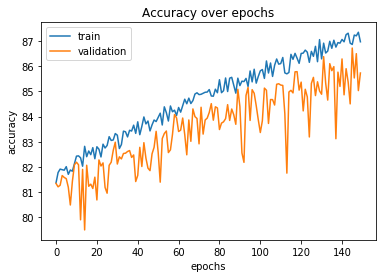

In [42]:
plt.plot(np.array(history1.history['acc']) * 100)
plt.plot(np.array(history1.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

# Tunning the learning rate and decay in sgd

In [0]:
sgd = optimizers.sgd(lr = 0.0001)

In [96]:
# compiling the ANN classifier
keras_model1.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training data
history2 = keras_model1.fit(x_train, y_train, validation_data=(x_val,y_val),batch_size = 200, epochs = 50, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/50
42000/42000 [==============================] - 3s 63us/step - loss: 14.4376 - acc: 0.1038 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
42000/42000 [==============================] - 2s 38us/step - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
42000/42000 [==============================] - 2s 38us/step - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
42000/42000 [==============================] - 2s 37us/step - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
42000/42000 [==============================] - 2s 38us/step - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
42000/42000 [==============================] - 2s 38us/step - loss: 14.5078 - acc: 0.0999 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
42000/42000 [==============================] - 2s 41us/step - loss: 14.5078 - acc: 0.0999 - val_loss: 14.

In [48]:
results_2 = keras_model1.evaluate(x_val, y_val)
print('Val_acc after changing learning rate and decay in SGD: ', results_2[1])

60000/60000 [==============================] - 2s 38us/step
Val_acc after changing learning rate and decay in SGD:  0.8744833333333333


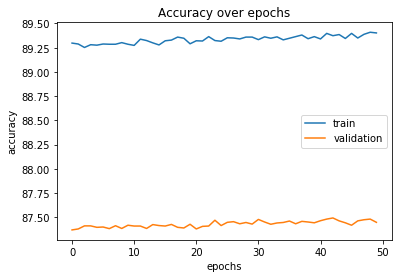

In [49]:
plt.plot(np.array(history2.history['acc']) * 100)
plt.plot(np.array(history2.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

# Implementing (vectorized) backpropagation (Adam optimizer, cross entropy loss, cost functions)

In [0]:
#Initialize the Artificial Neural Network Classifier
keras_model_3 = Sequential()

In [51]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_3.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_3.add(Dense(256, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_3.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_3.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_3.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_3.add(BatchNormalization())
#Adding Activation function
keras_model_3.add(Activation('relu'))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_3.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_3.add(Activation('softmax'))

In [52]:
keras_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               524800    
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
activation_7 (Activation)    (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
activation_8 (Activation)    (None, 256)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [0]:
#Setting the learning rate in sgd
sgd = optimizers.adam(lr = 0.0001)
# compiling the ANN classifier
keras_model_3.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [54]:
# Fitting the ANN to the Training data
history3 = keras_model_3.fit(x_train, y_train, validation_data=(x_val,y_val),batch_size = 1000, epochs = 150, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/150
42000/42000 [==============================] - 2s 44us/step - loss: 2.3353 - acc: 0.1612 - val_loss: 2.3433 - val_acc: 0.1701
Epoch 2/150
42000/42000 [==============================] - 1s 18us/step - loss: 1.9764 - acc: 0.2945 - val_loss: 2.1021 - val_acc: 0.2454
Epoch 3/150
42000/42000 [==============================] - 1s 20us/step - loss: 1.7403 - acc: 0.4242 - val_loss: 1.9069 - val_acc: 0.3512
Epoch 4/150
42000/42000 [==============================] - 1s 19us/step - loss: 1.5578 - acc: 0.5277 - val_loss: 1.7174 - val_acc: 0.4326
Epoch 5/150
42000/42000 [==============================] - 1s 20us/step - loss: 1.4154 - acc: 0.5971 - val_loss: 1.5763 - val_acc: 0.4962
Epoch 6/150
42000/42000 [==============================] - 1s 20us/step - loss: 1.3020 - acc: 0.6442 - val_loss: 1.4367 - val_acc: 0.5720
Epoch 7/150
42000/42000 [==============================] - 1s 20us/step - loss: 1.2084 - acc: 0.6790 - val_loss: 1.3742 - 

In [55]:
results_3 = keras_model_3.evaluate(x_val, y_val)
print('Val_acc using Adam, cross entropy, cost function : ', results_3[1])

60000/60000 [==============================] - 4s 62us/step
Val_acc using Adam, cross entropy, cost function :  0.93925


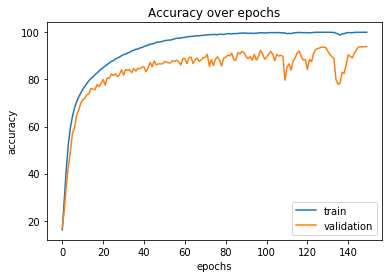

In [56]:
plt.plot(np.array(history3.history['acc']) * 100)
plt.plot(np.array(history3.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

# Implementing batch normalization and Dropout for training the neural network

In [0]:
##Initialize the Artificial Neural Network Classifier
keras_model_4 = Sequential()

In [0]:
# Input Layer
#Adding Input layer and activation functions ReLU
keras_model_4.add(Dense(512, kernel_initializer='he_normal',input_shape = (1024, )))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 1
#Adding first Hidden layer
keras_model_4.add(Dense(256,kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 2
#Adding second Hidden layer
keras_model_4.add(Dense(128, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 3
#Adding third Hidden layer
keras_model_4.add(Dense(64, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

#Hidden Layer 4
#Adding fourth Hidden layer
keras_model_4.add(Dense(32, kernel_initializer='he_normal'))
#Adding BatchNormalization Layer
keras_model_4.add(BatchNormalization())
#Adding Activation function
keras_model_4.add(Activation('relu'))
#Adding Dropout Layer
keras_model_4.add(Dropout(0.2))

# Output Layer
#Adding output layer which is of 10 nodes (digidts)
keras_model_4.add(Dense(10))
#Adding Activation function
# Here, we are using softmax function because we have multiclass classsification
keras_model_4.add(Activation('softmax'))

In [60]:
keras_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_6 (Batch (None, 512)               2048      
_________________________________________________________________
activation_13 (Activation)   (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
activation_14 (Activation)   (None, 256)              

In [0]:
#Setting the learning rate in SGD
sgd = optimizers.adam(lr = 0.001)
# compiling the ANN classifier
keras_model_4.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [62]:
# Fitting the ANN to the Training data
history4 = keras_model_4.fit(x_train, y_train, validation_data=(x_val,y_val),batch_size = 100, epochs = 150, verbose = 1)

Train on 42000 samples, validate on 60000 samples
Epoch 1/150
42000/42000 [==============================] - 13s 301us/step - loss: 2.3851 - acc: 0.0993 - val_loss: 2.3035 - val_acc: 0.1041
Epoch 2/150
42000/42000 [==============================] - 10s 243us/step - loss: 2.3099 - acc: 0.1103 - val_loss: 2.3313 - val_acc: 0.1236
Epoch 3/150
42000/42000 [==============================] - 10s 243us/step - loss: 2.1159 - acc: 0.1769 - val_loss: 2.1526 - val_acc: 0.1683
Epoch 4/150
42000/42000 [==============================] - 10s 241us/step - loss: 1.9190 - acc: 0.2715 - val_loss: 2.0170 - val_acc: 0.2592
Epoch 5/150
42000/42000 [==============================] - 10s 244us/step - loss: 1.6987 - acc: 0.3643 - val_loss: 2.1306 - val_acc: 0.2851
Epoch 6/150
42000/42000 [==============================] - 10s 244us/step - loss: 1.5543 - acc: 0.4167 - val_loss: 1.5966 - val_acc: 0.3841
Epoch 7/150
42000/42000 [==============================] - 10s 242us/step - loss: 1.4699 - acc: 0.4421 - val_l

In [63]:
results_4 = keras_model_4.evaluate(x_val, y_val)
print('Val_acc using sgd, cross entropy, cost function, batch normalization and drop out : ', results_4[1])

60000/60000 [==============================] - 5s 88us/step
Val_acc using sgd, cross entropy, cost function, batch normalization and drop out :  0.88795


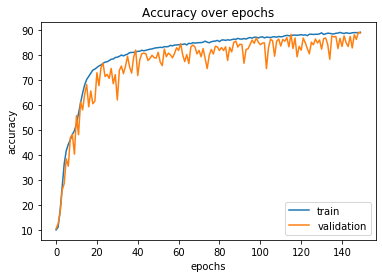

In [64]:
plt.plot(np.array(history4.history['acc']) * 100)
plt.plot(np.array(history4.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

# Testing NN on test data on Model_4 with hypertuning

In [65]:
# Fitting the ANN to the test data
history_final = keras_model_4.fit(x_train, y_train, validation_data=(x_test,y_test),batch_size = 100, epochs = 150, verbose = 1)

Train on 42000 samples, validate on 18000 samples
Epoch 1/150
42000/42000 [==============================] - 9s 212us/step - loss: 0.3881 - acc: 0.8922 - val_loss: 0.6619 - val_acc: 0.8023
Epoch 2/150
42000/42000 [==============================] - 9s 212us/step - loss: 0.3809 - acc: 0.8935 - val_loss: 0.5451 - val_acc: 0.8407
Epoch 3/150
42000/42000 [==============================] - 9s 211us/step - loss: 0.3941 - acc: 0.8887 - val_loss: 0.5787 - val_acc: 0.8289
Epoch 4/150
42000/42000 [==============================] - 9s 212us/step - loss: 0.3854 - acc: 0.8920 - val_loss: 0.7188 - val_acc: 0.7807
Epoch 5/150
42000/42000 [==============================] - 9s 209us/step - loss: 0.3817 - acc: 0.8930 - val_loss: 0.5953 - val_acc: 0.8219
Epoch 6/150
42000/42000 [==============================] - 9s 207us/step - loss: 0.3798 - acc: 0.8934 - val_loss: 0.6907 - val_acc: 0.7956
Epoch 7/150
42000/42000 [==============================] - 9s 218us/step - loss: 0.3892 - acc: 0.8910 - val_loss: 0.

In [66]:
results_final = keras_model_4.evaluate(x_test, y_test)
print('Final Test accuracy : ', results_final[1])

18000/18000 [==============================] - 2s 88us/step
Final Test accuracy :  0.8422222222222222


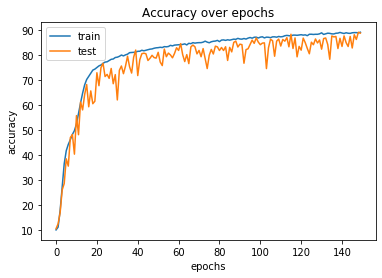

In [67]:
plt.plot(np.array(history4.history['acc']) * 100)
plt.plot(np.array(history4.history['val_acc']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.title('Accuracy over epochs')
plt.show()

In [0]:
#Store the accuracy results for each model in a dataframe for final comparison
#results1 = pd.DataFrame({'Model':['Using sgd optimizer, categorical crossentropy loss function and Accuracy metric'], 'Accuracy': result_1[1],index={'1'})
#results2 = pd.DataFrame({'Model':['Val_acc after changing learning rate and decay in SGD'], 'Accuracy': result_2[1]},index={'2'})
#results3 = pd.DataFrame({'Model':['Test'], 'Accuracy': result_3[1]},index={'3'})
#results4 = pd.DataFrame({'Model':['Final Test Accuracy'], 'Accuracy': results_final[1]]},index={'4'})
#results= pd.concat([results1, results2, results3,results4])
#results = results[['Model', 'Accuracy']]
#results

**Predicting the digits using NN classifier on test data**

**Image 1**

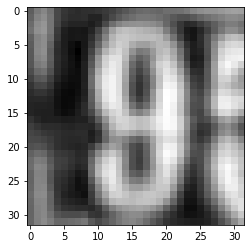

In [76]:
#Showing the image
plt.imshow(x_test[3].reshape(32,32),cmap='gray')

In [77]:
#Predicting the digits
keras_model_4.predict_classes(x_test)[3]

9

**Image 2**

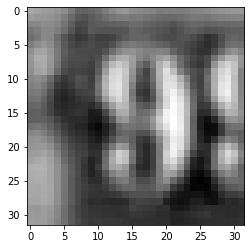

In [81]:
#Showing the image
plt.imshow(x_test[5].reshape(32,32),cmap='gray')

In [82]:
#Predicting the digits
keras_model_4.predict_classes(x_test)[5]

9

**Image 3**

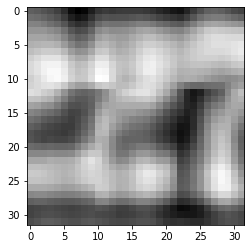

In [84]:
#Showing the image
plt.imshow(X_test[30].reshape(32,32),cmap='gray')

In [85]:
#Predicting the digits
keras_model_4.predict_classes(x_test)[30]

2

In [0]:
y_predict = keras_model_4.predict(x_test)

In [87]:
y_predict[0]

array([0.44070694, 0.07140794, 0.05005363, 0.04778431, 0.03225165,
       0.02648252, 0.07949123, 0.03428261, 0.12045214, 0.09708702],
      dtype=float32)

In [88]:
np.argmax(y_predict[0])

0

In [89]:
y_test[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [90]:
rounded_predictions = keras_model_4.predict_classes(x_test, batch_size=128, verbose=0)
rounded_predictions[1]

7

In [91]:
rounded_labels=np.argmax(y_test, axis=1)
rounded_labels[1]

7

In [0]:
from sklearn import metrics

In [93]:
cm = metrics.confusion_matrix(rounded_labels,rounded_predictions)
print(cm)

[[1564   21   18   23   11   13   26   14   47   77]
 [  37 1561   18   23   33   26   11   34   27   58]
 [  11   14 1573   37   31   17    4   34   20   62]
 [   7   25   40 1288   13  211   11   16   47   61]
 [  24   50   11   10 1593   32   17    7   18   50]
 [   7   11   10   42    8 1566   27    2   41   54]
 [  43   12   11    8   28  126 1420    7  137   40]
 [  15   63   56   28   11   17    4 1568   11   35]
 [  41   21   19   37   15   48   49    4 1471  107]
 [  45   19   21   23   15   61    7   14   43 1556]]


In [94]:
cr=metrics.classification_report(rounded_labels,rounded_predictions)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.86      0.87      1814
           1       0.87      0.85      0.86      1828
           2       0.89      0.87      0.88      1803
           3       0.85      0.75      0.80      1719
           4       0.91      0.88      0.89      1812
           5       0.74      0.89      0.81      1768
           6       0.90      0.78      0.83      1832
           7       0.92      0.87      0.89      1808
           8       0.79      0.81      0.80      1812
           9       0.74      0.86      0.80      1804

    accuracy                           0.84     18000
   macro avg       0.85      0.84      0.84     18000
weighted avg       0.85      0.84      0.84     18000



Hypertuning : 

1. Add/remove one layer
2. Increase/decrease the number of hidden units
3. Change the probability in dropout
4. Increase/ decrease the batch size 
5. Increase / decrease the epochs 

1. Model Accuracy

*  Base model(Model_1): Train acc:	87 %	and Validation Acc : 86 %
*  Model_2: Train acc:	87 %	and Validation Acc: 86 %
*  Model_3:	Train acc: 100 %	and validation Acc: 93 % ( overfit)
*  Model_4	Train Acc : 92 % and validation Acc : 84 % ( Epochs=150)

On comparing these four models, one can notice that whenever we change the dropout value or add a dropout layer, there will be a significant positive surge in the final accuracy scores and the difference between train and test acc will be reduced. 


Benchmark & Justification: 
* The best model - reaches test accuracy of 85 %, while the human's performance on this dataset reaches 98% accuracy. (The model is built by Goodefellow $et\ al$)
* Comparing to threshold this is not accurate enough for transcribing sequence digits in real world. 

